In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.base import BaseEstimator
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
from sklearn. metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error
%matplotlib inline

In [2]:
df = pd.read_csv('day.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df = df.drop(["instant", "dteday", "registered", "casual"], axis=1)
df.drop_duplicates(inplace=True)
df.season = df.season.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
df.mnth = df.mnth.map({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'june', 
                         7: 'july', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'})
df.weekday = df.weekday.map({0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'})
df.weathersit = df.weathersit.map({1: 'clear', 2: 'misty', 3: 'light_snowrain', 4: 'heavy_snowrain'})
df.shape

(730, 12)

In [6]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
cols = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed", "cnt"]

cols_sub_target = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed"]

num_cols = ["temp", "atemp", "hum", "windspeed"]
cat_cols = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
target_col = "cnt"

<Axes: xlabel='cnt', ylabel='Count'>

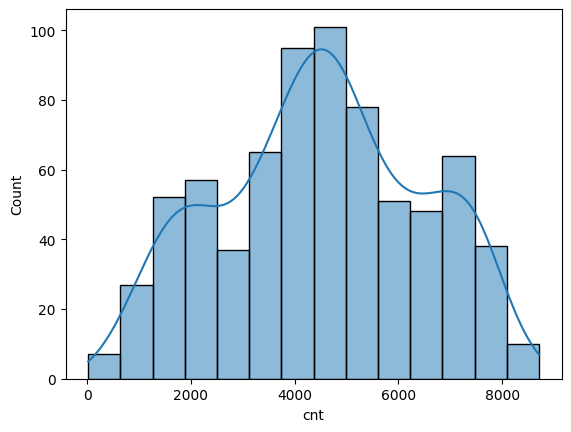

In [8]:
sns.histplot(df["cnt"], kde=True)

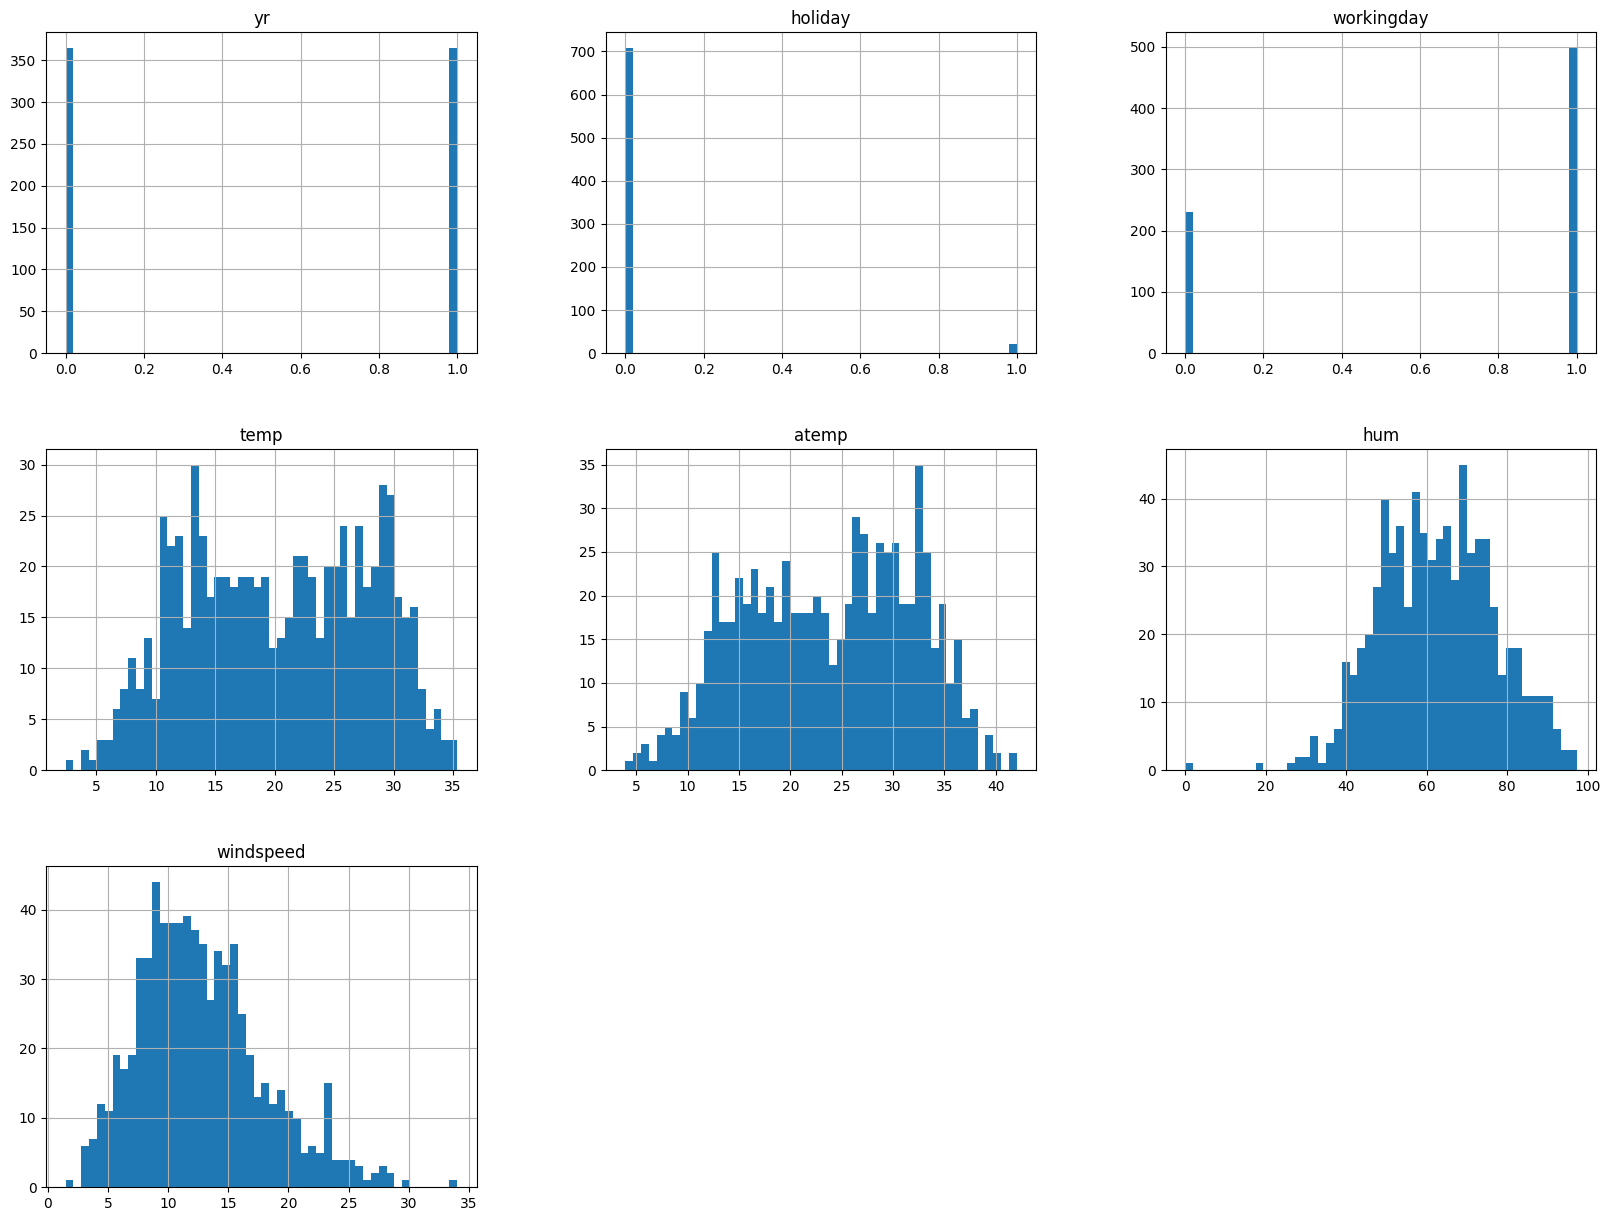

In [9]:
df[cols_sub_target].hist(bins=50, figsize=(20,15))
plt.show()

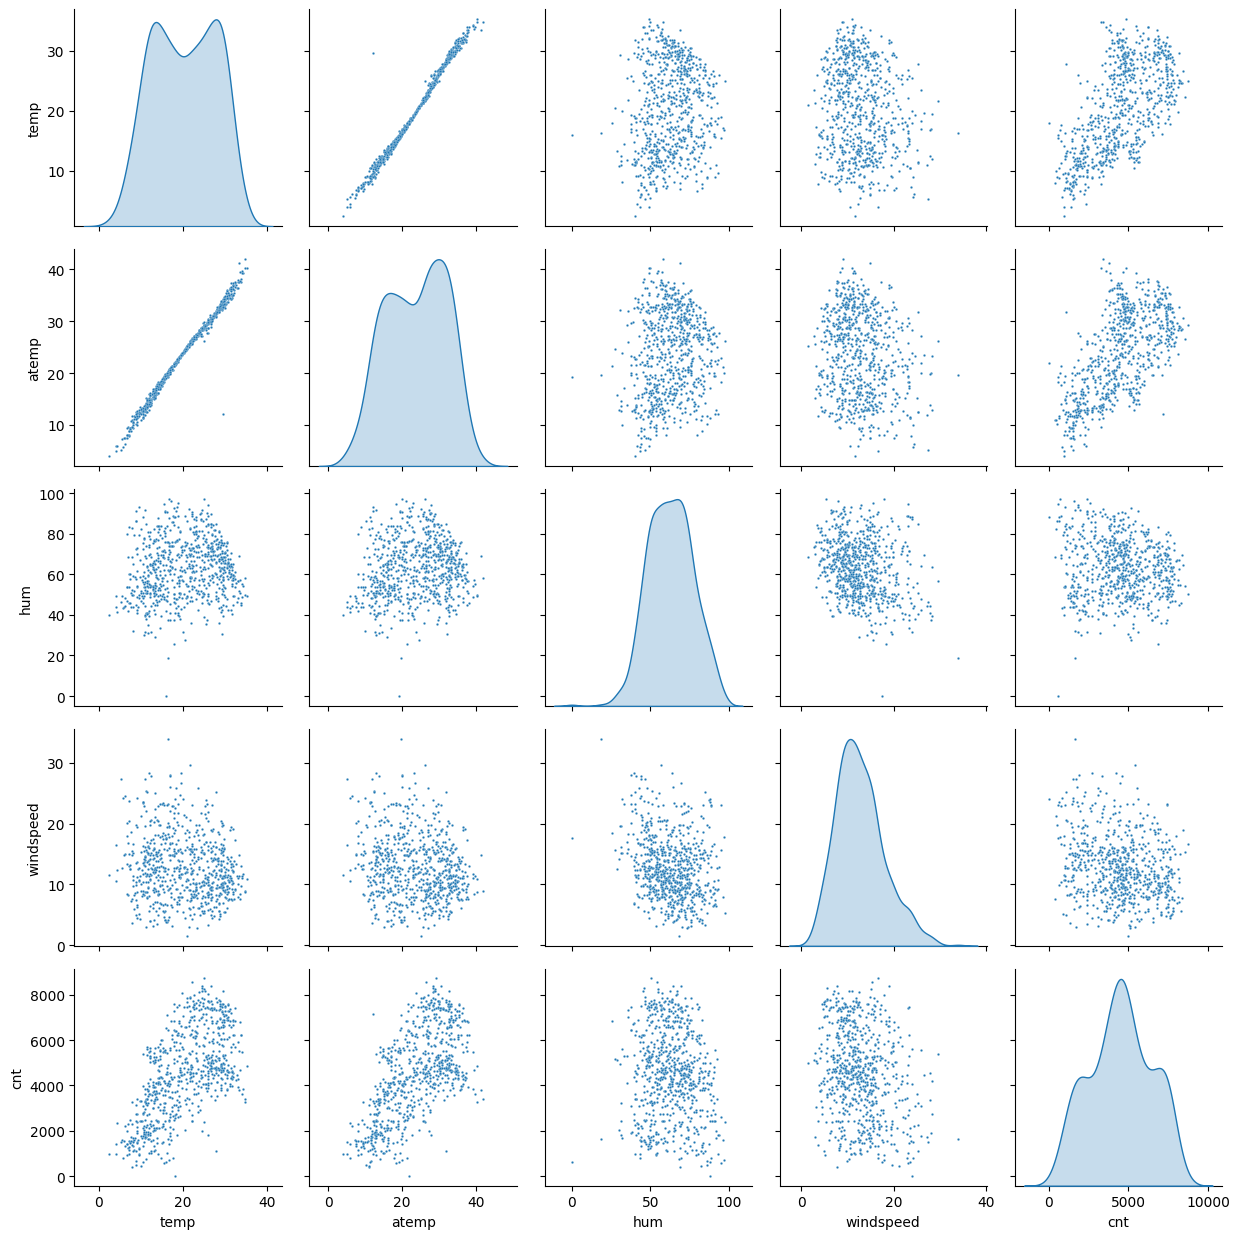

In [10]:
sns.pairplot(df[num_cols + [target_col]], diag_kind='kde', plot_kws={'s':3})
plt.tight_layout()
plt.show()

In [11]:
fig = px.bar(df, x='mnth', y='cnt')

fig.update_layout(
    title={
        'text': "Demand of bikes per months",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [12]:
fig = px.bar(df, x='weekday', y='cnt')

fig.update_layout(
    title={
        'text': "Demand of bikes per days of week",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [13]:
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


<Axes: >

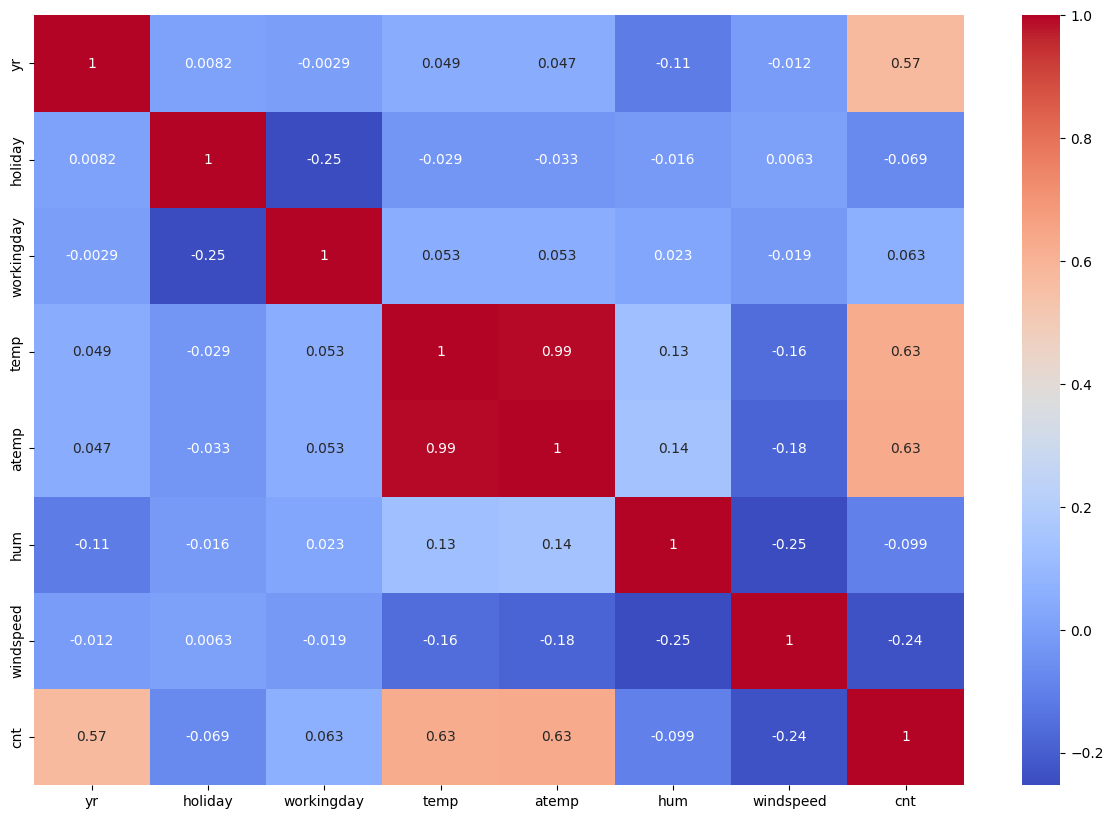

In [14]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot = True, cmap="coolwarm")

In [15]:
corr_matrix["cnt"].sort_values(ascending = False)

cnt           1.000000
atemp         0.630685
temp          0.627044
yr            0.569728
workingday    0.062542
holiday      -0.068764
hum          -0.098543
windspeed    -0.235132
Name: cnt, dtype: float64

In [16]:
class LinReg(BaseEstimator):
    def __init__(self,
                 learning_rate=0.01, 
                 max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter

    def add_intercept(self, X):
        m = X.shape[0]
        ones = np.ones((m, 1))
        X_new = np.column_stack((ones, X))
        return X_new

    def hypothesis(self, X, theta):
        return np.dot(X, theta)
    
    def cost_function(self, X, y, theta):
        m = X.shape[0]

        if m == 0:
            return None
        
        return (1 / (2 * m)) * sum(np.power(self.hypothesis(X, theta) - y, 2))

    def gradient(self, X, y, theta):
        m = X.shape[0]

        return (1 / m) * np.dot(X.T, self.hypothesis(X, theta) - y)

    def gradient_descent(self, X, y, theta):
        costs = []
        J = self.cost_function(X, y, theta)
        costs.append(J)
        
        for i in range(1, self.max_iter + 1):
            theta -= self.learning_rate * self.gradient(X, y, theta)
            cost = self.cost_function(X, y, theta)
            costs.append(cost)

        return theta, costs
    
    def fit(self, X, y):
        X_new = self.add_intercept(X)
        self.theta = np.zeros(X_new.shape[1])
        self.theta, self.costs = self.gradient_descent(X_new, y, self.theta)

    def predict(self, X):
        X_new = self.add_intercept(X)
        y_pred = self.hypothesis(X_new, self.theta)
        
        return y_pred

In [17]:
X, y = df.drop("cnt", axis=1), df[["cnt"]]
print('X={}, y={}'.format(X.shape, y.shape))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train={}, y_train={}'.format(X_train.shape, y_train.shape))
print('X_test{}, y_test={}'.format(X_test.shape, y_test.shape))

X=(730, 11), y=(730, 1)
X_train=(584, 11), y_train=(584, 1)
X_test(146, 11), y_test=(146, 1)


In [18]:
num_pip = Pipeline([
    ('scaler', StandardScaler())
])

cat_pip = Pipeline([
    ('encoder', OneHotEncoder(categories='auto'))
])

preprocessor = ColumnTransformer([
    ('num', num_pip, num_cols),
    ('cat', cat_pip, cat_cols)
])

X_train_t = preprocessor.fit_transform(X_train)
X_test_t = preprocessor.fit_transform(X_test)

print('X_train_t={}, y_train={}'.format(X_train_t.shape, y_train.shape))
print('X_test_t{}, y_test={}'.format(X_test_t.shape, y_test.shape))

X_train_t=(584, 36), y_train=(584, 1)
X_test_t(146, 36), y_test=(146, 1)


In [19]:
lin_reg = LinReg()
lin_reg_1 = LinearRegression()
lin_reg_2 = SGDRegressor()
lin_reg_3 = Ridge()

In [20]:
y_train = np.reshape(y_train.to_numpy(), (y_train.shape[0],))
y_test = np.reshape(y_test.to_numpy(), (y_test.shape[0],))

In [21]:
def evaluate_metrics(y_actual, y_predicted):
    return mean_squared_error(y_actual, y_predicted, squared=False), mean_absolute_error(y_actual, y_predicted), r2_score(y_actual, y_predicted)

In [22]:
def write_metrics(regressors):
    
    results_df = pd.DataFrame(columns=["mean_squared_error", "mean_absolute_error", "r2_score"])

    for name, regressor in regressors:
        regressor.fit(X_train_t, y_train)
        
        y_train_pred = regressor.predict(X_train_t)
        y_test_pred = regressor.predict(X_test_t)
        
        train_metrics = evaluate_metrics(y_train, y_train_pred)
        test_metrics = evaluate_metrics(y_test, y_test_pred)
        
        results_df.loc[name, "mean_squared_error"] = (train_metrics[0], test_metrics[0])
        results_df.loc[name, "mean_absolute_error"] = (train_metrics[1], test_metrics[1])
        results_df.loc[name, "r2_score"] = (train_metrics[2], test_metrics[2])

    return results_df

In [23]:
regressors = [("LinReg", lin_reg), ("LinearRegression", lin_reg_1), ("SGDRegressor", lin_reg_2), ("Ridge", lin_reg_3)]
results_df = write_metrics(regressors)
results_df

,mean_squared_error,mean_absolute_error,r2_score
LinReg,"(803.6843379394496, 651.5204133259349)","(586.7951193349705, 487.56783253828536)","(0.8307231221886551, 0.8759864308850528)"
LinearRegression,"(772.4699895109441, 681.9318392327217)","(562.1538340115935, 503.9431539919648)","(0.8436168839906777, 0.8641389121398486)"
SGDRegressor,"(780.3106380794376, 657.0633946236321)","(571.0940453797296, 495.0373188331842)","(0.8404261637825011, 0.8738672984093101)"
Ridge,"(772.7107010786953, 677.7093341278525)","(562.6059870285727, 502.2356063364943)","(0.8435194068314565, 0.8658162001504587)"


In [24]:
linreg_params = {
    'learning_rate': uniform(0.001, 0.5),
    'max_iter': [1000, 5000, 10000]
}

sgdreg_params = {
    'eta0': uniform(0, 0.1),
    'max_iter': range(100, 10001, 100),
    'tol': uniform(0, 0.1)
}

ridge_params = {
    'alpha': uniform(0, 100),
    'max_iter': [1000, 5000, 10000],
    'tol': uniform(0, 0.1)
}

linreg_search = RandomizedSearchCV(LinReg(), linreg_params, n_iter=10, cv=5, scoring='neg_mean_squared_error')
sgdreg_search = RandomizedSearchCV(SGDRegressor(), sgdreg_params, n_iter=10, cv=5)
ridge_search = RandomizedSearchCV(Ridge(), ridge_params, n_iter=10, cv=5)

In [25]:
linreg_search.fit(X_train_t, y_train)
sgdreg_search.fit(X_train_t, y_train)
ridge_search.fit(X_train_t, y_train)

best_linreg = linreg_search.best_estimator_
best_sgdreg = sgdreg_search.best_estimator_
best_ridge = ridge_search.best_estimator_

print(linreg_search.best_estimator_)
print(sgdreg_search.best_estimator_)
print(ridge_search.best_estimator_)

LinReg(learning_rate=0.1657671936995948)
SGDRegressor(eta0=0.021754027954560374, max_iter=3400, tol=0.0529860098535607)
Ridge(alpha=4.098444846498661, max_iter=5000, tol=0.07679697424307963)


In [26]:
lin_reg = LinReg(learning_rate=linreg_search.best_params_['learning_rate'],
                  max_iter=linreg_search.best_params_['max_iter'])
lin_reg_1 = LinearRegression()
lin_reg_2 = SGDRegressor(eta0=sgdreg_search.best_params_['eta0'],
                         max_iter=sgdreg_search.best_params_['max_iter'],
                         tol=sgdreg_search.best_params_['tol'])
lin_reg_3 = Ridge(alpha=ridge_search.best_params_['alpha'],
                  max_iter=ridge_search.best_params_['max_iter'],
                  tol=ridge_search.best_params_['tol'])

regressors = [("LinReg", lin_reg), ("LinearRegression", lin_reg_1), ("SGDRegressor", lin_reg_2), ("Ridge", lin_reg_3)]

results_df = write_metrics(regressors)
results_df

,mean_squared_error,mean_absolute_error,r2_score
LinReg,"(772.6339833280305, 680.8456919428211)","(562.2059395328117, 503.28525210087247)","(0.8435504773036787, 0.8645713531160956)"
LinearRegression,"(772.4699895109441, 681.9318392327217)","(562.1538340115935, 503.9431539919648)","(0.8436168839906777, 0.8641389121398486)"
SGDRegressor,"(778.151649966131, 664.0784590191846)","(564.0798912864448, 492.70168882726335)","(0.84130797004564, 0.8711596375633404)"
Ridge,"(775.227008429803, 669.3378996277766)","(566.3229507926262, 498.7811553230763)","(0.8424985994614529, 0.8691107483040085)"


In [27]:
def plot_results(y_train_pred, y_train, y_test_pred, y_test):
    plt.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')

    plt.scatter(y_test_pred, y_test_pred - y_test,
                c='limegreen', marker='s', edgecolor='white',
                label='Test data')

    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=0, xmax=20000, color='black')
    plt.tight_layout()
    plt.show()

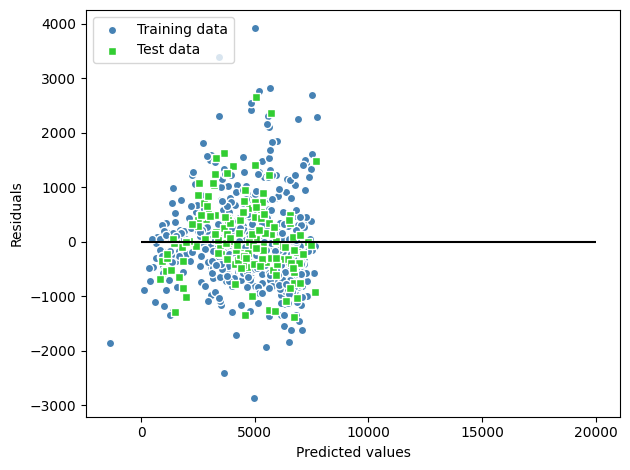

In [28]:
lin_reg.fit(X_train_t, y_train)
y_train_pred = lin_reg.predict(X_train_t)
y_test_pred = lin_reg.predict(X_test_t)
plot_results(y_train_pred, y_train, y_test_pred, y_test)

In [29]:
feature_inportances = lin_reg.theta
cat_features = []
cat_encoder = preprocessor.named_transformers_["cat"]

for idx, column in enumerate(cat_cols):
    cat_features.extend([column+'_'+str(val) for val in cat_encoder.named_steps['encoder'].categories_[idx]])

attributes = num_cols + cat_features
importance = sorted(zip(feature_inportances[1:], attributes), reverse=True)

print("Feature importance for LinReg")
print("Top 5 features")
for i in range(5):
    print(importance[i])
print()
print("Bottom 5 features")
for i in range(1, 6):
    print(importance[-i])

Feature importance for LinReg
Top 5 features
(1532.968049793745, 'yr_1')
(1207.9815526351576, 'weathersit_clear')
(1006.0869629739408, 'season_winter')
(807.9576104777507, 'holiday_0')
(773.3055671428564, 'weathersit_misty')

Bottom 5 features
(-884.8620868761594, 'weathersit_light_snowrain')
(-669.8369493257471, 'season_spring')
(-436.5430168918905, 'yr_0')
(-366.1775287338478, 'mnth_nov')
(-275.9636639476728, 'mnth_dec')


In [30]:
lin_reg_1.fit(X_train_t, y_train)
feature_inportances = lin_reg_1.coef_
importance = sorted(zip(feature_inportances, attributes), reverse=True)
print("Feature importance for LinearRegression (sklearn)")
print("Top 5 features")
for i in range(5):
    print(importance[i])
print()
print("Bottom 5 features")
for i in range(1, 6):
    print(importance[-i])

Feature importance for LinearRegression (sklearn)
Top 5 features
(985.3513238026751, 'yr_1')
(845.4786338893208, 'weathersit_clear')
(794.3083716025255, 'season_winter')
(606.5499623888893, 'mnth_sep')
(462.18817071542156, 'temp')

Bottom 5 features
(-1253.3367415840498, 'weathersit_light_snowrain')
(-985.3513238026765, 'yr_0')
(-964.3742793493827, 'season_spring')
(-531.9226363640128, 'mnth_nov')
(-412.14031486257284, 'mnth_dec')
